# Importing necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
import xgboost as xgb
import requests
import json
import folium
from folium.plugins import HeatMapWithTime, HeatMap
!pip install geopandas folium
!pip install mplleaflet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading Data

In [13]:
api_token = 'QlaxQhfN4pblYnVaLDKwkCU0tgIOplUZ5nCAK2wx'
base_url = "https://api.data.gov/ed/collegescorecard/v1/schools?"
base_url = f"{base_url}api_key={api_token}"

In [14]:
parameters = ["&school.degrees_awarded.predominant=3","&school.operating=1"]

parameters_url = "".join(parameters)

year = "latest."
fields = {
          # School Information
          "location.lat" : "Latitude",
          "location.lon" : "Longitude",
          "school.name" : "School Name",
          "id" : "ID",
          "school.state": "State",
          "school.ft_faculty_rate":  "Full-time Faculty Rate",
          "school.instructional_expenditure_per_fte": "Expenditures per student",
          "school.faculty_salary": "Faculty salary",
          "school.locale" : "Locale",
          "school.region_id": "Region",
          
          # admission
          year + "admissions.admission_rate.overall" : "Admission rate",
          year + "admissions.sat_scores.average.overall" : "Average SAT score", # SAT chosen as it has slightly more complete data

          # completion
          year + "completion.completion_cohort_4yr_150nt": "Completion rate",
         
          # earnings
          year + "earnings.6_yrs_after_entry.median" : "Median earnings",
  
          # field of study
          year + "academics.program.bachelors.architecture" : "Bachelor in architecture",
          year + "academics.program.bachelors.ethnic_cultural_gender" : "Bachelor in ethnic_cultural_gender",
          year + "academics.program.bachelors.communication" : "Bachelor in communication",
          year + "academics.program.bachelors.communications_technology" : "Bachelor in communications_technology",
          year + "academics.program.bachelors.computer" : "Bachelor in computer",
          year + "academics.program.bachelors.personal_culinary" : "Bachelor in personal_culinary",
          year + "academics.program.bachelors.education" : "Bachelor in education",
          year + "academics.program.bachelors.engineering" : "Bachelor in engineering",
          year + "academics.program.bachelors.engineering_technology" : "Bachelor in engineering_technology",
          year + "academics.program.bachelors.language" : "Bachelor in language",
          year + "academics.program.bachelors.family_consumer_science" : "Bachelor in family_consumer_science",
          year + "academics.program.bachelors.legal" : "Bachelor in legal",
          year + "academics.program.bachelors.english" : "Bachelor in english",
          year + "academics.program.bachelors.humanities" : "Bachelor in humanities",
          year + "academics.program.bachelors.library" : "Bachelor in library",
          year + "academics.program.bachelors.biological" : "Bachelor in biological",
          year + "academics.program.bachelors.mathematics" : "Bachelor in mathematics",
          year + "academics.program.bachelors.military" : "Bachelor in military",
          year + "academics.program.bachelors.multidiscipline" : "Bachelor in multidiscipline",
          year + "academics.program.bachelors.parks_recreation_fitness" : "Bachelor in parks_recreation_fitness",
          year + "academics.program.bachelors.philosophy_religious" : "Bachelor in philosophy_religious",
          year + "academics.program.bachelors.theology_religious_vocation" : "Bachelor in theology_religious_vocation",
          year + "academics.program.bachelors.physical_science" : "Bachelor in physical_science",
          year + "academics.program.bachelors.science_technology" : "Bachelor in science_technology", 
          year + "academics.program.bachelors.psychology" : "Bachelor in psychology",
          year + "academics.program.bachelors.security_law_enforcement" : "Bachelor in security_law_enforcement",
          year + "academics.program.bachelors.public_administration_social_service" : "Bachelor in public_administration_social_service",
          year + "academics.program.bachelors.social_science" : "Bachelor in social_science",
          year + "academics.program.bachelors.construction" : "Bachelor in construction",
          year + "academics.program.bachelors.mechanic_repair_technology" : "Bachelor in mechanic_repair_technology",
          year + "academics.program.bachelors.precision_production" : "Bachelor in precision_production",
          year + "academics.program.bachelors.transportation" : "Bachelor in transportation",
          year + "academics.program.bachelors.visual_performing" : "Bachelor in visual_performing",
          year + "academics.program.bachelors.health" : "Bachelor in health",
          year + "academics.program.bachelors.business_marketing" : "Bachelor in business_marketing",
          year + "academics.program.bachelors.history" : "Bachelor in history",

          # student profile
          year + "student.demographics.race_ethnicity.white": "Race_white",
          year + "student.demographics.race_ethnicity.black": "Race_black",
          year + "student.demographics.race_ethnicity.hispanic": "Race_hispanic",
          year + "student.demographics.race_ethnicity.asian": "Race_asian",

          # year + "student.demographics.avg_family_income": "Average family income",
          year + "student.demographics.median_family_income": "Median family income",
          year + "student.share_firstgeneration_parents.middleschool": "Parents from middleschool",
          year + "student.share_firstgeneration_parents.highschool": "Parents from highschool",
          year + "student.share_firstgeneration_parents.somecollege": "Parents from college",
         }

fields_url = '&fields=' + ",".join(fields.keys())

per_page = 50

#get metadata
url = base_url + parameters_url + fields_url + f'&page=0&_per_page={per_page}'
first_load = requests.get(url).json()
check_data = pd.DataFrame.from_dict((first_load['results']))
check_data.head()

,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.completion.completion_cohort_4yr_150nt,latest.earnings.6_yrs_after_entry.median,latest.academics.program.bachelors.architecture,latest.academics.program.bachelors.ethnic_cultural_gender,latest.academics.program.bachelors.communication,latest.academics.program.bachelors.communications_technology,latest.academics.program.bachelors.computer,latest.academics.program.bachelors.personal_culinary,...,school.name,school.state,school.ft_faculty_rate,school.instructional_expenditure_per_fte,school.faculty_salary,school.locale,school.region_id,id,location.lat,location.lon
0,0.8965,959.0,998.0,28704.0,1,1,0,1,1,0,...,Alabama A & M University,AL,0.9960,4836,7599.0,12,5,100654,34.783368,-86.568502
1,0.8060,1245.0,1715.0,39271.0,0,1,1,0,1,0,...,University of Alabama at Birmingham,AL,0.7619,14691,11380.0,12,5,100663,33.505697,-86.799345
2,0.7711,1300.0,714.0,47533.0,0,0,1,0,1,0,...,University of Alabama in Huntsville,AL,0.6702,8320,9697.0,12,5,100706,34.724557,-86.640449
3,0.9888,938.0,1067.0,25949.0,0,0,1,0,1,0,...,Alabama State University,AL,0.6797,9579,7194.0,12,5,100724,32.364317,-86.295677
4,0.8039,1262.0,6791.0,44485.0,0,1,1,0,1,0,...,The University of Alabama,AL,0.7707,9650,10349.0,12,5,100751,33.211875,-87.545978


In [15]:
metadata = first_load['metadata']
print(f"metadata: {metadata}, columns = {len(fields)}")
total_page = metadata['total'] // metadata['per_page']

data = pd.DataFrame()
for page in range(total_page + 1):
  url = base_url + parameters_url + fields_url + f'&page={page}&_per_page={per_page}'
  response = requests.get(url).json()
  data = pd.concat([data, pd.json_normalize(response['results'])])

data = data.rename(columns = fields)
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns')

metadata: {'page': 0, 'total': 1989, 'per_page': 50}, columns = 58
Data has 1989 rows and 58 columns


In [16]:
# Check for missing data
data.isna().sum()

Admission rate                                      355
Average SAT score                                   888
Completion rate                                     149
Median earnings                                     175
Bachelor in architecture                              0
Bachelor in ethnic_cultural_gender                    0
Bachelor in communication                             0
Bachelor in communications_technology                 0
Bachelor in computer                                  0
Bachelor in personal_culinary                         0
Bachelor in education                                 0
Bachelor in engineering                               0
Bachelor in engineering_technology                    0
Bachelor in language                                  0
Bachelor in family_consumer_science                   0
Bachelor in legal                                     0
Bachelor in english                                   0
Bachelor in humanities                          

Fields with highest missing values are average SAT score and parents' education levels.

# School Dataset - Exploratory data analysis

In [17]:
data.columns

Index(['Admission rate', 'Average SAT score', 'Completion rate',
       'Median earnings', 'Bachelor in architecture',
       'Bachelor in ethnic_cultural_gender', 'Bachelor in communication',
       'Bachelor in communications_technology', 'Bachelor in computer',
       'Bachelor in personal_culinary', 'Bachelor in education',
       'Bachelor in engineering', 'Bachelor in engineering_technology',
       'Bachelor in language', 'Bachelor in family_consumer_science',
       'Bachelor in legal', 'Bachelor in english', 'Bachelor in humanities',
       'Bachelor in library', 'Bachelor in biological',
       'Bachelor in mathematics', 'Bachelor in military',
       'Bachelor in multidiscipline', 'Bachelor in parks_recreation_fitness',
       'Bachelor in philosophy_religious',
       'Bachelor in theology_religious_vocation',
       'Bachelor in physical_science', 'Bachelor in science_technology',
       'Bachelor in psychology', 'Bachelor in security_law_enforcement',
       'Bachelor in 

In [18]:
school_data = data[['Admission rate', 'Average SAT score', 'Completion rate',
       'Median earnings','Race_white',
       'Race_black', 'Race_hispanic', 'Race_asian', 'Median family income',
       'Parents from middleschool', 'Parents from highschool',
       'Parents from college', 
       'Full-time Faculty Rate', 'Expenditures per student',
       'Faculty salary', 'Locale', 'Region','Latitude','Longitude','ID']].dropna().set_index('ID')

In [19]:
school_data.describe()

,Admission rate,Average SAT score,Completion rate,Median earnings,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college,Full-time Faculty Rate,Expenditures per student,Faculty salary,Locale,Region,Latitude,Longitude
count,809.00000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,0.70407,1136.755253,1390.761434,43839.710754,0.529351,0.144531,0.143315,0.057701,49095.226205,0.030710,0.295357,0.673934,0.693410,11977.135970,8894.154512,19.283066,4.284302,38.144860,-89.170288
std,0.20010,130.928196,1524.620959,10654.021793,0.222639,0.186074,0.138703,0.071674,19790.725863,0.023882,0.080073,0.093223,0.225342,10612.869332,2639.557107,9.043225,2.022341,5.047072,15.011821
min,0.05010,842.000000,8.000000,22972.000000,0.000800,0.003700,0.000000,0.000000,10702.000000,0.002952,0.085406,0.384661,0.069000,2144.000000,3405.000000,11.000000,1.000000,18.344193,-158.056403
25%,0.60670,1049.000000,380.000000,36881.000000,0.407400,0.047000,0.057200,0.013900,34919.000000,0.016053,0.243045,0.608907,0.526200,7463.000000,7121.000000,12.000000,3.000000,34.365529,-95.187346
50%,0.74780,1111.000000,770.000000,42194.000000,0.577300,0.082800,0.097900,0.028300,44254.000000,0.023853,0.308550,0.664673,0.705500,9601.000000,8323.000000,13.000000,5.000000,39.187173,-85.765321
75%,0.84520,1201.000000,1743.000000,48213.000000,0.697300,0.158200,0.176400,0.068200,61931.000000,0.036951,0.355325,0.734375,0.880400,12706.000000,10277.000000,23.000000,5.000000,41.710009,-78.503428
max,0.99880,1550.000000,10598.000000,112623.000000,0.931500,0.961300,0.972100,0.374600,121852.000000,0.201153,0.477686,0.900498,1.000000,139766.000000,21143.000000,43.000000,9.000000,64.857560,-64.972866


In [20]:
locale_mapping = {11:1, 12:1, 13:1, 21:2, 22:2, 23:2, 31:3, 32:3, 33:3, 41:4, 42:4, 43:4}
school_data['Locale'] = school_data['Locale'].apply(lambda x: locale_mapping[x])
school_data.describe()

,Admission rate,Average SAT score,Completion rate,Median earnings,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college,Full-time Faculty Rate,Expenditures per student,Faculty salary,Locale,Region,Latitude,Longitude
count,809.00000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,0.70407,1136.755253,1390.761434,43839.710754,0.529351,0.144531,0.143315,0.057701,49095.226205,0.030710,0.295357,0.673934,0.693410,11977.135970,8894.154512,1.751545,4.284302,38.144860,-89.170288
std,0.20010,130.928196,1524.620959,10654.021793,0.222639,0.186074,0.138703,0.071674,19790.725863,0.023882,0.080073,0.093223,0.225342,10612.869332,2639.557107,0.894884,2.022341,5.047072,15.011821
min,0.05010,842.000000,8.000000,22972.000000,0.000800,0.003700,0.000000,0.000000,10702.000000,0.002952,0.085406,0.384661,0.069000,2144.000000,3405.000000,1.000000,1.000000,18.344193,-158.056403
25%,0.60670,1049.000000,380.000000,36881.000000,0.407400,0.047000,0.057200,0.013900,34919.000000,0.016053,0.243045,0.608907,0.526200,7463.000000,7121.000000,1.000000,3.000000,34.365529,-95.187346
50%,0.74780,1111.000000,770.000000,42194.000000,0.577300,0.082800,0.097900,0.028300,44254.000000,0.023853,0.308550,0.664673,0.705500,9601.000000,8323.000000,1.000000,5.000000,39.187173,-85.765321
75%,0.84520,1201.000000,1743.000000,48213.000000,0.697300,0.158200,0.176400,0.068200,61931.000000,0.036951,0.355325,0.734375,0.880400,12706.000000,10277.000000,2.000000,5.000000,41.710009,-78.503428
max,0.99880,1550.000000,10598.000000,112623.000000,0.931500,0.961300,0.972100,0.374600,121852.000000,0.201153,0.477686,0.900498,1.000000,139766.000000,21143.000000,4.000000,9.000000,64.857560,-64.972866


In [22]:
earnings_skewness = school_data['Median earnings'].skew()
earnings_kurtosis = school_data['Median earnings'].kurt()
median = np.median(school_data['Median earnings'])

print(earnings_skewness, earnings_kurtosis,median)

1.5689592107753896 4.408658910978989 42194.0


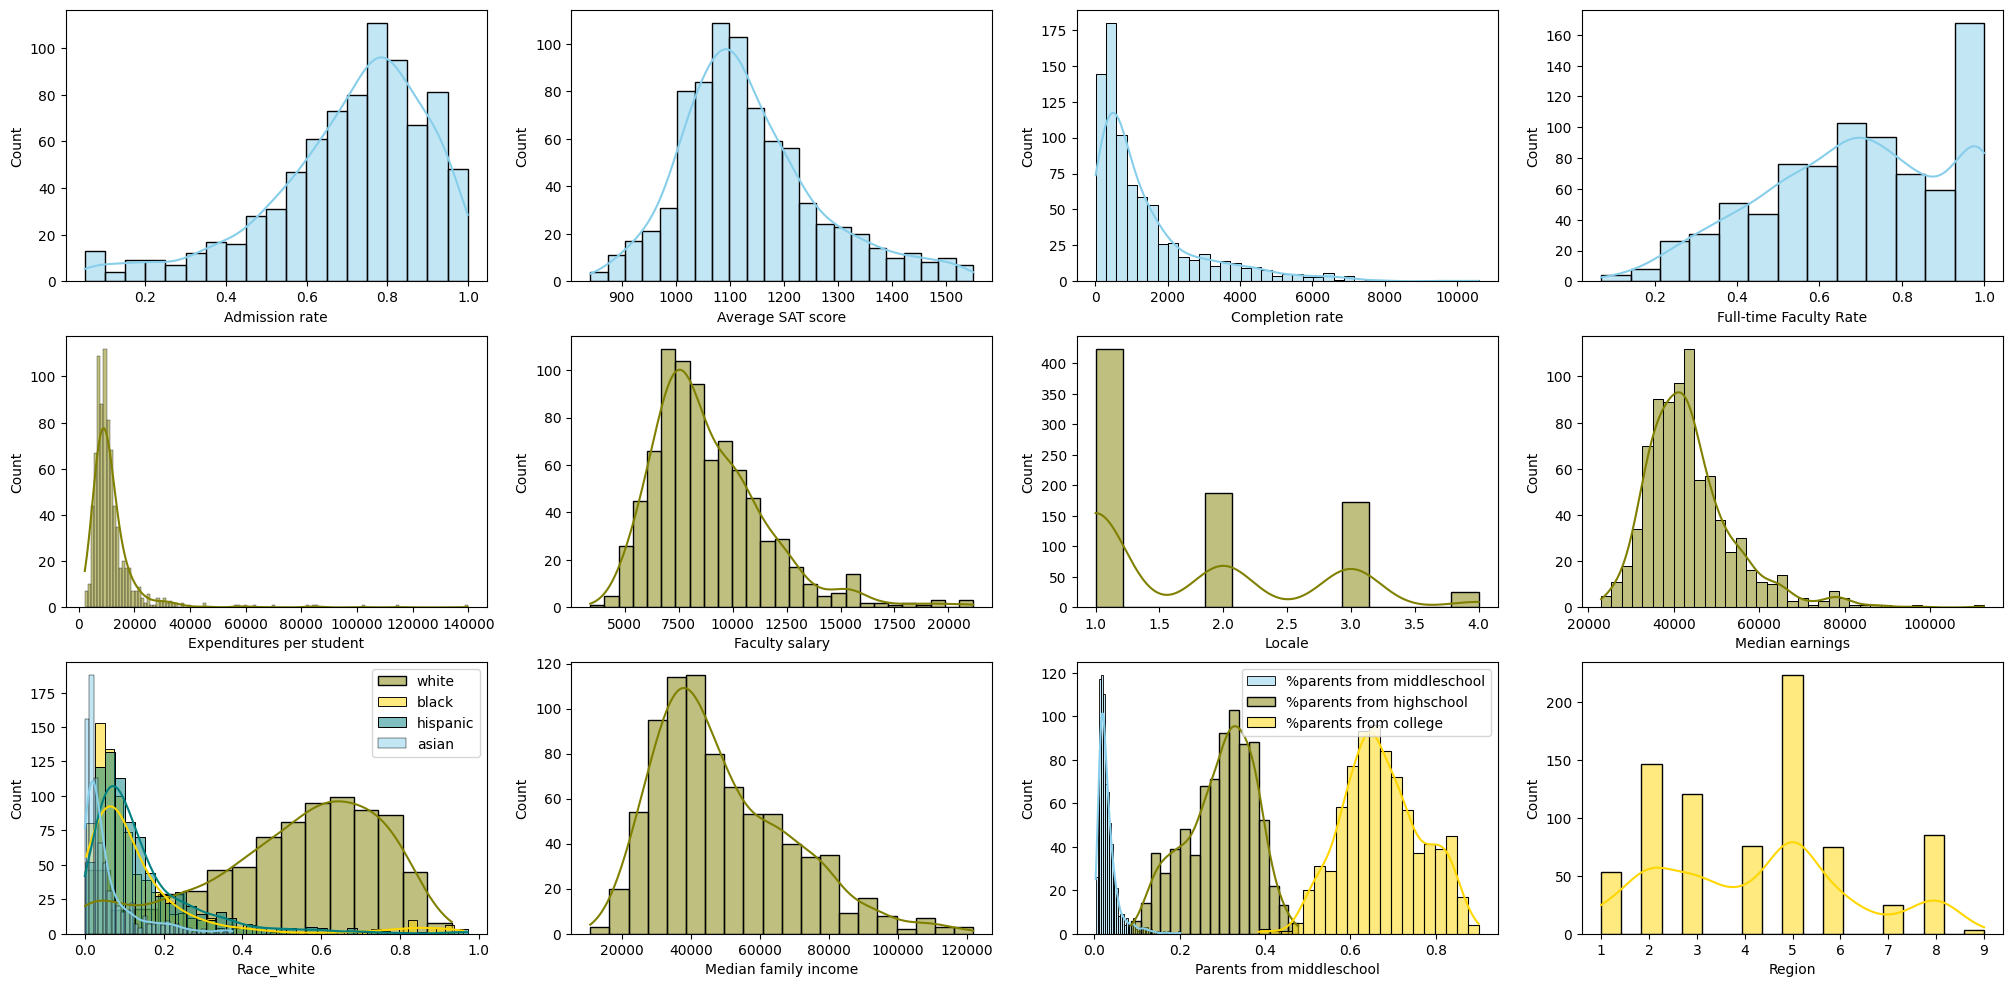

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(25, 12))

sns.histplot(data=school_data, x="Admission rate", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=school_data, x="Average SAT score", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=school_data, x="Completion rate", kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=school_data, x="Full-time Faculty Rate", kde=True, color="skyblue", ax=axs[0, 3])
sns.histplot(data=school_data, x="Expenditures per student", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=school_data, x="Faculty salary", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=school_data, x="Locale", kde=True, color="olive",  ax=axs[1, 2])
sns.histplot(data=school_data, x="Median earnings", kde=True, color="olive",  ax=axs[1, 3])
sns.histplot(data=school_data, x="Race_white", kde=True, color="olive", label="white", ax=axs[2, 0])
sns.histplot(data=school_data, x="Race_black", kde=True, color="gold", label="black", ax=axs[2, 0])
sns.histplot(data=school_data, x="Race_hispanic", kde=True, color="teal", label="hispanic", ax=axs[2, 0])
sns.histplot(data=school_data, x="Race_asian", kde=True, color="skyblue", label="asian", ax=axs[2, 0])
axs[2, 0].legend()
sns.histplot(data=school_data, x="Median family income", kde=True, color="olive", label="median family income", ax=axs[2, 1])
sns.histplot(data=school_data, x="Parents from middleschool", kde=True, color="skyblue", label="%parents from middleschool", ax=axs[2, 2])
sns.histplot(data=school_data, x="Parents from highschool", kde=True, color="olive", label="%parents from highschool", ax=axs[2, 2])
sns.histplot(data=school_data, x="Parents from college", kde=True, color="gold", label="%parents from college", ax=axs[2, 2])
axs[2, 2].legend()
sns.histplot(data=school_data, x="Region", kde=True, color="gold", label="Region", ax=axs[2, 3])

plt.show()

In [ ]:
# Heatmap
geodata = school_data[['Latitude', 'Longitude', 'Median earnings']]
geodata['Log_earnings'] = np.log(geodata['Median earnings'])

m = folium.Map(location=[39.50, -98.35], zoom_start=4)
heatmap_data = geodata[['Latitude', 'Longitude', 'Median earnings']].values.tolist()
HeatMap(heatmap_data, min_opacity=0.2, radius=25, blur=15, max_val=geodata['Log_earnings'].max(), max_zoom=1).add_to(m)
m.save("earnings_heatmap.html")

import IPython.display as display
display.HTML('<a href="earnings_heatmap.html" target="_blank">Click here to view the map</a>')

# we can conclude that earnings are generally concentrated around cities such as NY, LA, San Francisco and Chicago

<ipython-input-57-70cff86b28f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata['Log_earnings'] = np.log(geodata['Median earnings'])
<ipython-input-57-70cff86b28f5>:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heatmap_data, min_opacity=0.2, radius=25, blur=15, max_val=geodata['Log_earnings'].max(), max_zoom=1).add_to(m)


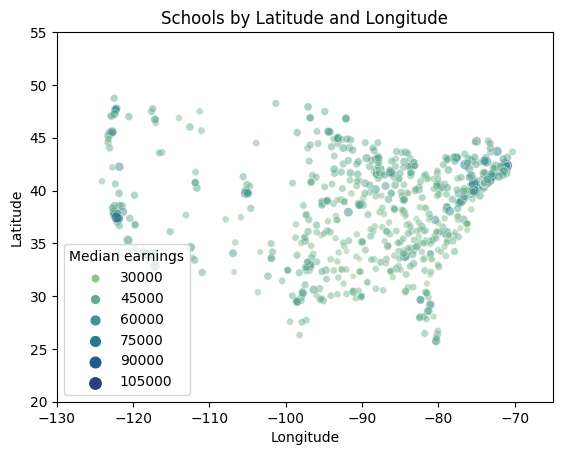

In [ ]:
sns.scatterplot(x='Longitude', y='Latitude', hue='Median earnings', alpha=0.5, data=school_data, palette='crest', size='Median earnings')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Schools by Latitude and Longitude')
plt.xlim(-130, -65)
plt.ylim(20, 55)
plt.show()

school_data = school_data.drop(['Latitude','Longitude'],axis=1)

In [ ]:
features = school_data.drop('Median earnings', axis = 1)
y = school_data['Median earnings']

,Admission rate,Average SAT score,Completion rate,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college,Full-time Faculty Rate,Expenditures per student,Faculty salary,Locale,Region
Admission rate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average SAT score,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678665,NaN,0.616772,0.722786,NaN,NaN
Completion rate,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_white,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_black,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_hispanic,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.698185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_asian,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.671211,NaN,NaN
Median family income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.799223,NaN,NaN,NaN,NaN,NaN
Parents from middleschool,NaN,NaN,NaN,NaN,NaN,0.698185,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parents from highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


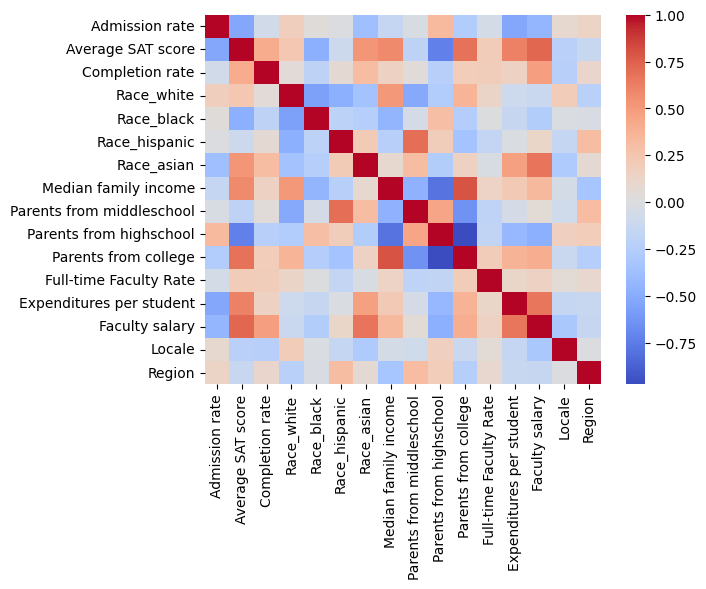

In [ ]:
sns.heatmap(features.corr(), cmap="coolwarm")
features.corr()[features.corr() > 0.6]

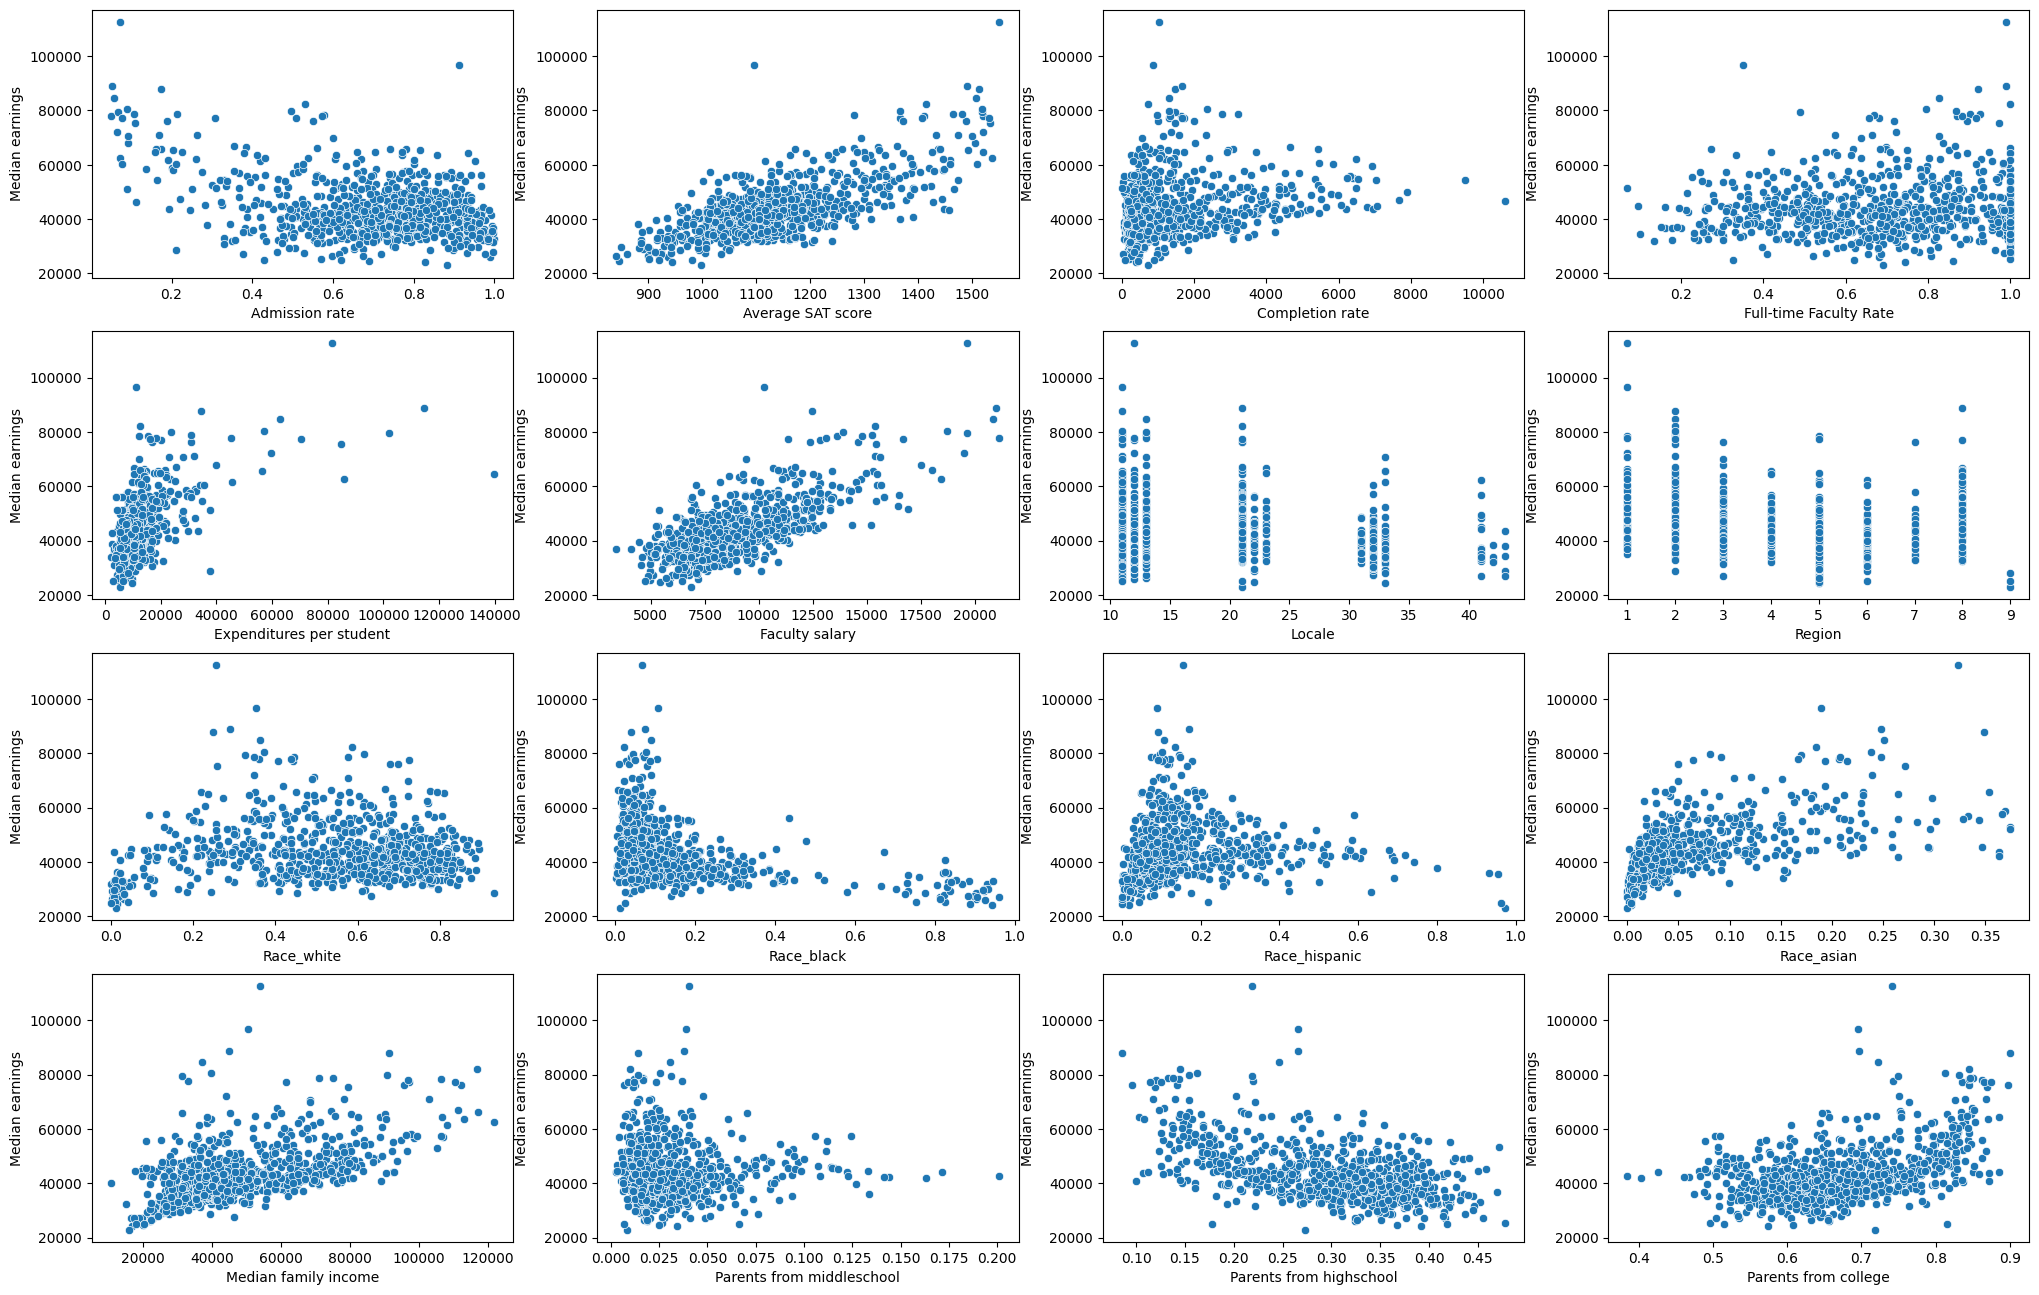

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(25, 16))

sns.scatterplot(data=school_data, x="Admission rate", y = 'Median earnings', ax=axs[0, 0])
sns.scatterplot(data=school_data, x="Average SAT score", y = 'Median earnings', ax=axs[0, 1])
sns.scatterplot(data=school_data, x="Completion rate", y = 'Median earnings',ax=axs[0, 2])
sns.scatterplot(data=school_data, x="Full-time Faculty Rate", y = 'Median earnings', ax=axs[0, 3])
sns.scatterplot(data=school_data, x="Expenditures per student", y = 'Median earnings', ax=axs[1, 0])
sns.scatterplot(data=school_data, x="Faculty salary", y = 'Median earnings', ax=axs[1, 1])
sns.scatterplot(data=data.dropna(), x="Locale", y = 'Median earnings', ax=axs[1, 2])
sns.scatterplot(data=data.dropna(), x="Region", y = 'Median earnings', ax=axs[1, 3])
sns.scatterplot(data=school_data, x="Race_white", y = 'Median earnings', ax=axs[2, 0])
sns.scatterplot(data=school_data, x="Race_black", y = 'Median earnings', ax=axs[2, 1])
sns.scatterplot(data=school_data, x="Race_hispanic", y = 'Median earnings', ax=axs[2, 2])
sns.scatterplot(data=school_data, x="Race_asian", y = 'Median earnings', ax=axs[2, 3])
sns.scatterplot(data=school_data, x="Median family income", y = 'Median earnings',ax=axs[3, 0])
sns.scatterplot(data=school_data, x="Parents from middleschool", y = 'Median earnings', ax=axs[3, 1])
sns.scatterplot(data=school_data, x="Parents from highschool", y = 'Median earnings', ax=axs[3, 2])
sns.scatterplot(data=school_data, x="Parents from college", y = 'Median earnings', ax=axs[3, 3])

plt.show()

In [ ]:
# Drop features
school_data = school_data.drop(['Parents from college', 'Locale', 'Region', 'Full-time Faculty Rate'], axis = 1)

KeyError: ignored

,Admission rate,Average SAT score,Completion rate,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college,Full-time Faculty Rate,Expenditures per student,Faculty salary,Locale,Region
Admission rate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average SAT score,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678665,NaN,0.616772,0.722786,NaN,NaN
Completion rate,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_white,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_black,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_hispanic,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.698185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_asian,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.671211,NaN,NaN
Median family income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.799223,NaN,NaN,NaN,NaN,NaN
Parents from middleschool,NaN,NaN,NaN,NaN,NaN,0.698185,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parents from highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


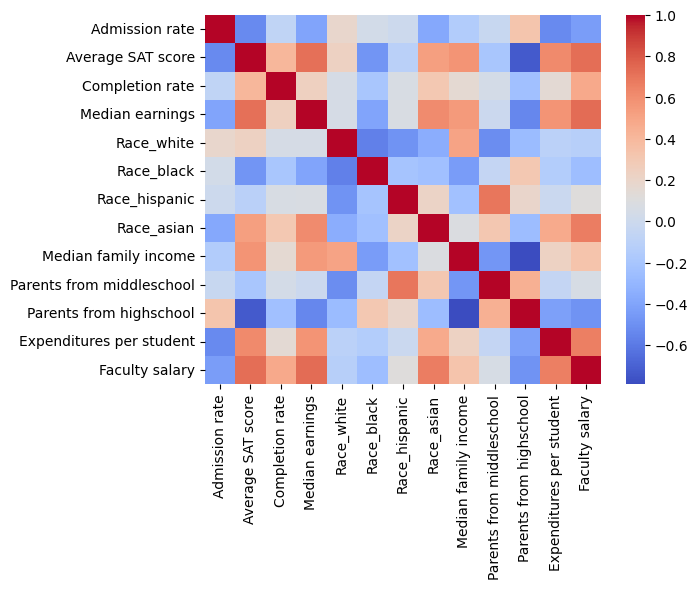

In [ ]:
sns.heatmap(school_data.corr(), cmap="coolwarm")
features.corr()[features.corr() > 0.6]

# School dataset - Feature Selection

In [ ]:
#build dataset 1 for regression (with Faculty salary)
regression_data = data[['Admission rate', 'Completion rate',
       'Median earnings','Race_white',
       'Race_black', 'Race_hispanic', 'Race_asian', 'Median family income',
       'Parents from middleschool', 'Parents from highschool',
       'Expenditures per student',
       'Faculty salary', 'ID']].set_index('ID').dropna()

y = regression_data['Median earnings']
X = regression_data.drop(['Median earnings'], axis = 1)
print(f'No. of datapoints in data with Faculty Salary: {X.shape[0]}')

In [ ]:
#build dataset 2 for regression (with SAT score)
regression_data2 = data[['Admission rate', 'Completion rate', 'Average SAT score',
       'Median earnings','Race_white',
       'Race_black', 'Race_hispanic', 'Race_asian', 'Median family income',
       'Parents from middleschool', 'Parents from highschool',
       'Expenditures per student',
       'ID']].set_index('ID').dropna()
regression_data2.shape

y2 = regression_data2['Median earnings']
X2 = regression_data2.drop(['Median earnings'], axis = 1)
print(f'No. of datapoints in data with Faculty Salary: {X2.shape[0]}')

In [ ]:
#double check correlation
X.corr()[X.corr() > 0.7]

,Admission rate,Completion rate,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Expenditures per student,Faculty salary
Admission rate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Completion rate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_white,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_black,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_hispanic,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Race_asian,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Median family income,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Parents from middleschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Parents from highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Expenditures per student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
X2.corr()[X2.corr() > 0.7]

,Admission rate,Completion rate,Average SAT score,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Expenditures per student
Admission rate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Completion rate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average SAT score,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_white,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_black,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Race_hispanic,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Race_asian,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Median family income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Parents from middleschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Parents from highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
# Standardise the features
feature_scaler1 = StandardScaler()
X_scaled = pd.DataFrame(feature_scaler1.fit_transform(X), columns = X.columns)
X_scaled.head()

In [ ]:
feature_scaler2 = StandardScaler()
X2_scaled = pd.DataFrame(feature_scaler2.fit_transform(X2), columns = X2.columns)
X2_scaled.head()

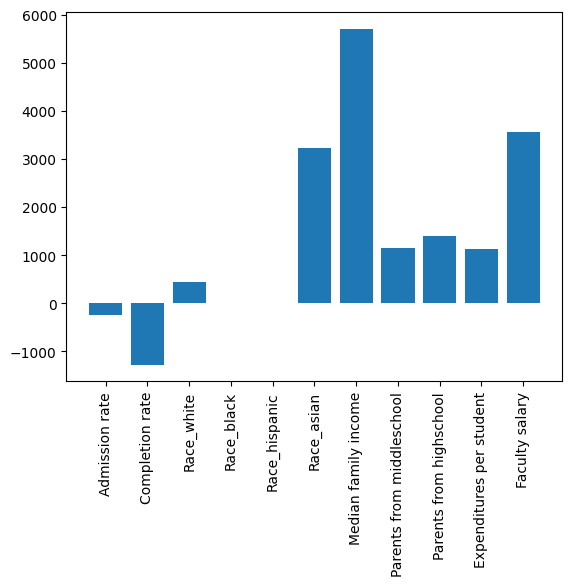

,Admission rate,Completion rate,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Expenditures per student,Faculty salary
0,-245.938043,-1274.099429,446.327105,-0.0,0.0,3223.399087,5710.850685,1155.78689,1404.017182,1128.085373,3558.730079


In [ ]:
# LASSO regression
search = GridSearchCV(Lasso(random_state = 42),{'alpha':np.arange(66,68,0.1)},cv = 5, scoring="neg_mean_squared_error")
search.fit(X_scaled, y)

check = Lasso(random_state = 42)
check.set_params(**search.best_params_).fit(X_scaled, y)
plt.bar(X_scaled.columns, check.coef_)
plt.xticks(rotation=90)
plt.show()
pd.DataFrame(np.reshape(check.coef_, (-1, 11)), columns = X_scaled.columns)

We should drop the black and white race as they have insignificant conttribute to median earnings. This can also be observed from the scatter plot between them and median earnings. 

In [ ]:
X_scaled = X_scaled.drop(['Race_white', 'Race_black'], axis = 1)

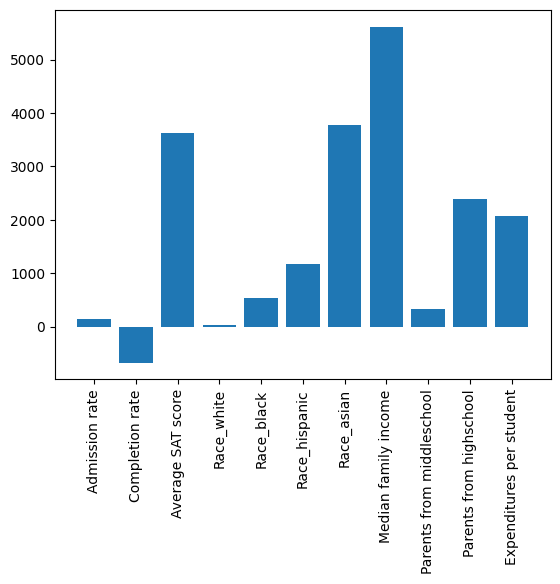

,Admission rate,Completion rate,Average SAT score,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Expenditures per student
0,141.520264,-671.233221,3634.08517,33.866806,547.164845,1173.12001,3777.646888,5617.586,327.917085,2396.641278,2079.766047


In [ ]:
# Lasso regression with SAT
search2 = GridSearchCV(Lasso(random_state = 42),{'alpha':np.arange(23,25,0.1)},cv = 5, scoring="neg_mean_squared_error")
search2.fit(X2_scaled, y2)

check2 = Lasso(random_state = 42)
check2.set_params(**search2.best_params_).fit(X2_scaled, y2)
plt.bar(X2_scaled.columns, check2.coef_)
plt.xticks(rotation=90)
plt.show()
pd.DataFrame(np.reshape(check2.coef_, (-1, 11)), columns = X2_scaled.columns)

For the features with SAT, most have good contribution, so we will keep them for now.

# School Dataset: Testing and evaluating models

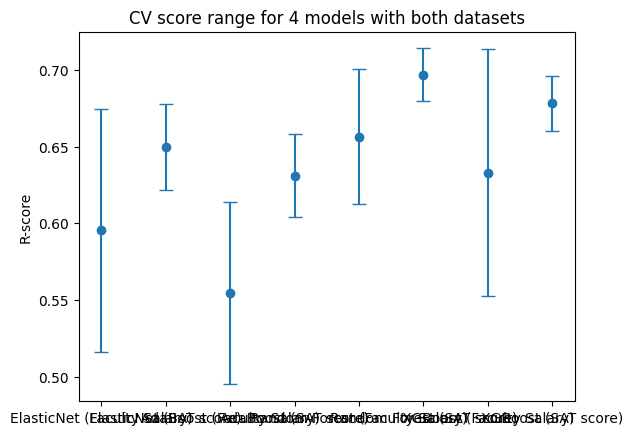

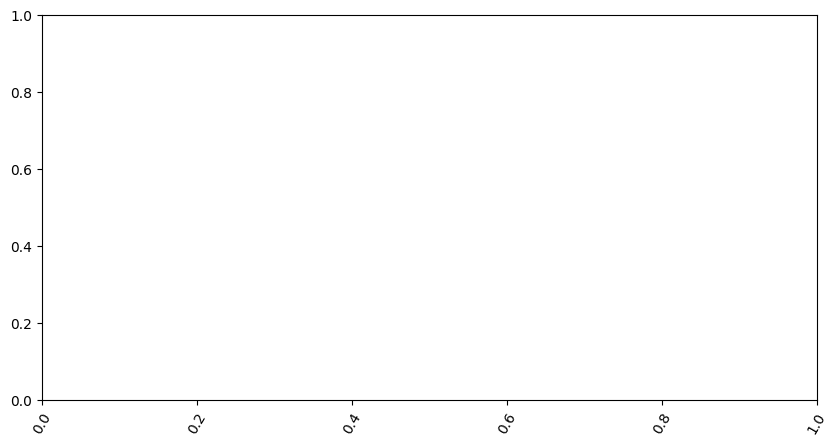

In [ ]:
# Test with basic 4 models
mean_score = []
std = []
models = ['ElasticNet (Faculty Salary)', 'ElasticNet (SAT score)', 'AdaBoost (Faculty Salary)', 'AdaBoost (SAT score)', 'Random Forest (Faculty Salary)', 'Random Forest (SAT score)', 'XGBoost (Faculty Salary)', 'XGBoost (SAT score)']

# Linear Model
temp = cross_val_score(ElasticNet(random_state= 42), X_scaled, y, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
temp = cross_val_score(ElasticNet(random_state= 42), X2_scaled, y2, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
# Boosting
temp = cross_val_score(AdaBoostRegressor(random_state= 42), X_scaled, y, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
temp = cross_val_score(AdaBoostRegressor(random_state= 42), X2_scaled, y2, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
# Random Forest
temp = cross_val_score(RandomForestRegressor(random_state= 42), X_scaled, y, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
temp = cross_val_score(RandomForestRegressor(random_state= 42), X2_scaled, y2, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
# XGBoost
temp = cross_val_score(xgb.XGBRegressor(random_state= 42), X_scaled, y, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
temp = cross_val_score(xgb.XGBRegressor(random_state= 42), X2_scaled, y2, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())

plt.errorbar(models, mean_score, yerr = std, fmt = 'o', capsize = 5)
plt.title('CV score range for 4 models with both datasets')
plt.ylabel('R-score')
plt.figure(figsize=(10, 5))
plt.xticks(rotation=60)
plt.show()

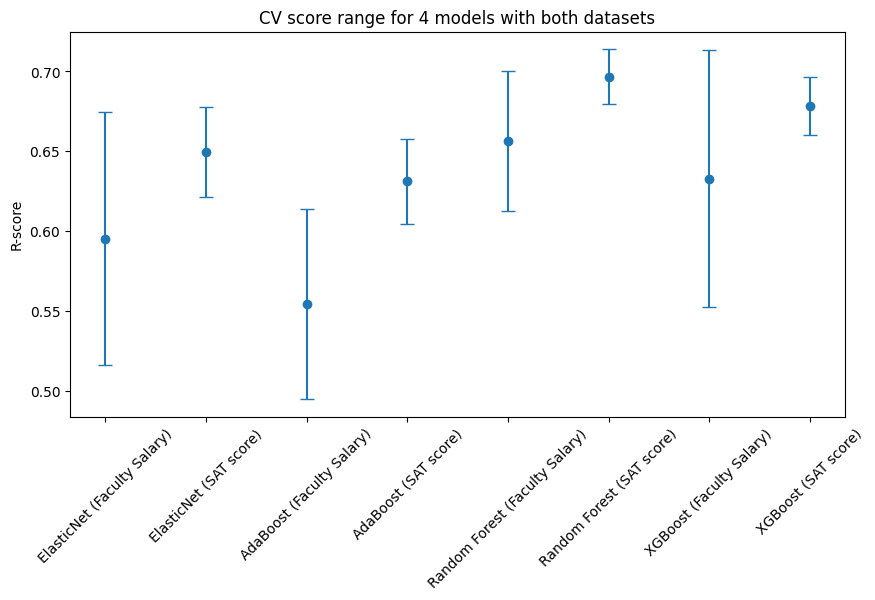

In [ ]:
plt.figure(figsize=(10, 5))
plt.errorbar(models, mean_score, yerr = std, fmt = 'o', capsize = 5)
plt.title('CV score range for 4 models with both datasets')
plt.ylabel('R-score')
plt.xticks(rotation=45)
plt.show()

**Observation:** Dataset with Faculty Salary performs better. Hence we move on to hyperparameter tuning with that. Random Forest and XGBoost both works better for the dataset, hence we tune both models for the SAT dataset.

# Random Forest Tuning

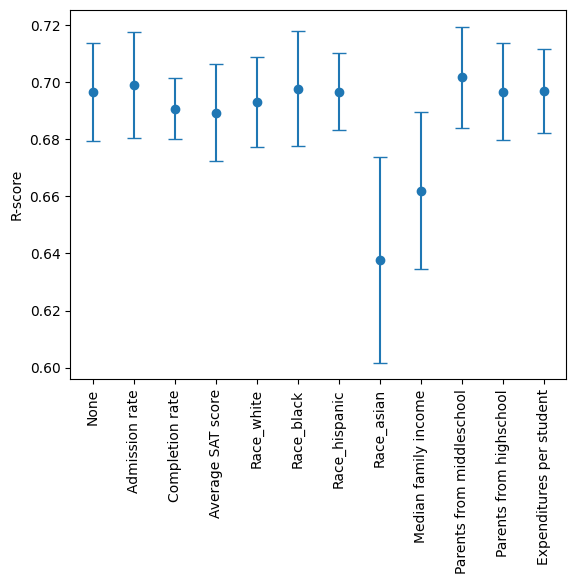

In [ ]:
# Drop random features with Random Forest Model to see if we can improve the score
mean_score = []
std = []
variable = ['None']

temp = cross_val_score(RandomForestRegressor(random_state= 42), X2_scaled, y2, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())
for i in range(len(X2_scaled.columns)):
  temp = cross_val_score(RandomForestRegressor(random_state= 42), X2_scaled.drop(X2_scaled.columns[i],axis = 1), y2, cv=5)
  mean_score.append(temp.mean())
  std.append(temp.std())
  variable.append(X2_scaled.columns[i])

plt.errorbar(variable, mean_score, yerr = std, fmt = 'o', capsize = 5)
plt.xticks(rotation=90)
plt.ylabel('R-score')
plt.show()

Dropping features does not seem to help the model much.

In [ ]:
# Tuning Random forest model
# Number of trees in random forest
n_estimators = [500, 600, 700, 800] #, 200, 300, 400, 500
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [20, 30, 40]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5, 6]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

gridsearch = GridSearchCV(estimator = RandomForestRegressor(random_state= 42), param_grid = param_grid, scoring='r2', cv = 5)
gridsearch.fit(X2_scaled, y2)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}
0.7080111458391457


In [ ]:
#Best Random Forest w faculty salary
temp = cross_val_score(RandomForestRegressor(random_state= 42, bootstrap = True, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 600), X2_scaled, y2, cv=5)
print(f'CV scores: {temp}')
print(f'Mean: {temp.mean()}, Std: {temp.std()}')

CV scores: [0.74055733 0.65176857 0.72213587 0.69624386 0.7293501 ]
Mean: 0.7080111458391457, Std: 0.03167273028642173


Tuning is a tradeover between overfitting and higher average R-score. Can't get must higher than 0.7 average R-Score

# XGBoost Tuning

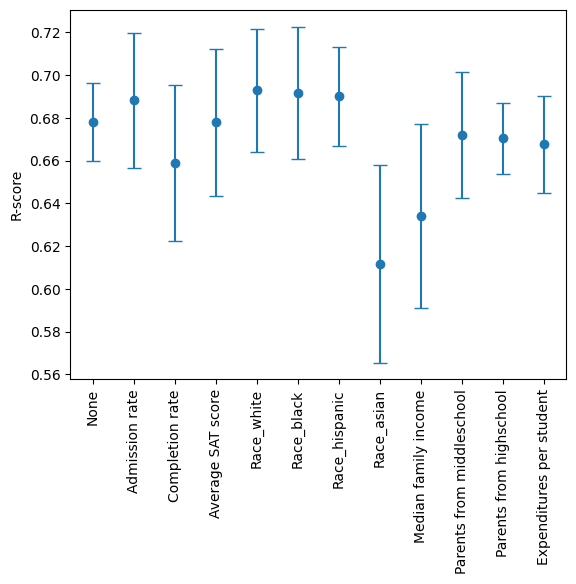

In [ ]:
# Drop random features with XGBoost Model to see if we can improve the score
mean_score = []
std = []
variable = ['None']

temp = cross_val_score(xgb.XGBRegressor(random_state= 42), X2_scaled, y2, cv=5)
mean_score.append(temp.mean())
std.append(temp.std())

#Drop random features
for i in range(11):
  temp = cross_val_score(xgb.XGBRegressor(random_state= 42), X2_scaled.drop(X2_scaled.columns[i],axis = 1), y2, cv=5)
  mean_score.append(temp.mean())
  std.append(temp.std())
  variable.append(X2_scaled.columns[i])

plt.errorbar(variable, mean_score, yerr = std, fmt = 'o', capsize = 5)
plt.xticks(rotation=90)
plt.ylabel('R-score')
plt.show()

Dropping features does not seem to help the model much. We try tuning the hyperparameters

In [ ]:
# Hyperparameter tuning with XGBoost
# learning rate
eta = [0.1, 0.2, 0.3]
# max_depth of the tree
max_depth = [10, 11, 12, 13, 14]
#min_child_weight
min_child_weight = [1, 2, 3, 4, 5]
#for L1 regularization
alpha = [0.1, 0.3, 0.5]
#subsampling to reduce overfitting
subsample = [0.3, 0.4, 0.5, 0.6, 0.7]
# Create the random grid
search_grid = {'eta': eta,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'alpha': alpha,
               'subsample': subsample,
               }

gridsearch = GridSearchCV(xgb.XGBRegressor(random_state= 42), search_grid, scoring = 'r2', cv = 5)
gridsearch.fit(X2_scaled, y2)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'alpha': 0.3, 'eta': 0.1, 'max_depth': 12, 'min_child_weight': 2, 'subsample': 0.5}
0.7216735306852007


In [ ]:
# Hyperparameter tuning with XGBoost
# learning rate
eta = [0.1]
# max_depth of the tree
max_depth = [12]
#min_child_weight
min_child_weight = [1, 2, 3, 4, 5]
#for L1 regularization
alpha = [0.3]
#subsampling to reduce overfitting
subsample = [0.5]
# Create the random grid
search_grid = {'eta': eta,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'alpha': alpha,
               'subsample': subsample,
               }

gridsearch = GridSearchCV(xgb.XGBRegressor(random_state= 42), search_grid, scoring = 'r2', cv = 5)
gridsearch.fit(X2_scaled, y2)
pd.DataFrame(gridsearch.cv_results_)[['param_min_child_weight', 'mean_test_score',	'std_test_score',	'rank_test_score']].sort_values('rank_test_score')

,param_min_child_weight,mean_test_score,std_test_score,rank_test_score
1,2,0.721674,0.032104,1
2,3,0.705202,0.026371,2
0,1,0.703679,0.037338,3
3,4,0.701058,0.027847,4
4,5,0.696828,0.032320,5


In [ ]:
#Best hyperparameters SAT drop faculty salary
temp = cross_val_score(xgb.XGBRegressor(random_state= 42,alpha = 0.3, eta = 0.1, max_depth = 12, min_child_weight = 2, subsample = 0.5), X2_scaled, y2, cv=5)
print(f'CV scores: {temp}')
print(f'Mean: {temp.mean()}, Std: {temp.std()}')

CV scores: [0.74842986 0.66628949 0.74092873 0.74821728 0.7045023 ]
Mean: 0.7216735306852007, Std: 0.03210444689613346


After tuning, the r-scored improved quite significantly. As it is better than the results from Random Forest, we will finalise with XGBoost Model

# Finalise the regression model

In [ ]:
#Finalize the regression model
temp = data[['Admission rate', 'Completion rate', 'Average SAT score', 'Race_white',
       'Race_black', 'Race_hispanic', 'Race_asian', 'Median family income',
       'Parents from middleschool', 'Parents from highschool',
       'Expenditures per student', 'Median earnings', 'ID']].dropna().set_index('ID')
X_final = temp.drop('Median earnings', axis = 1)
y_final = temp['Median earnings']

#Build the scaling into a pipeline for the final model
final_model = Pipeline([('scaler', StandardScaler()), ('model', xgb.XGBRegressor(random_state= 42, eta = 0.1, max_depth = 12, min_child_weight = 2, alpha = 0.3, subsample = 0.5))])
final_model.fit(X_final.values, y_final.values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(alpha=0.3, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eta=0.1,
                              eval_metric=None, feature_types=None, gamma=None,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None, min_child_weight=2,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

# Student dataset - Building K-Nearest Neighbor Dataset

In [ ]:
# Encode regions
state_to_region = {
    'Northeast': ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Southwest': ['AZ', 'NM', 'OK', 'TX'],
    'West': ['AK', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY'],
    'Southeast': ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']
}

def regionTransformer(data):
    region_map = {state: region for region, states in state_to_region.items() for state in states}
    data['Region'] = data['State'].map(region_map)
    # encoded_regions = pd.get_dummies(data['Region_mapping'], prefix='Region')
    # data = pd.concat([data, encoded_regions], axis=1)
    # data.drop(['Region_mapping','State'], axis=1, inplace=True)
    return data


In [ ]:
# Encode locale

def localeTransformer(data):
    locale_mapping = {11: 'City', 12: 'City', 13: 'City', 21: 'Suburb', 22: 'Suburb', 23: 'Suburb', 31: 'Town', 32: 'Town', 33: 'Town', 41: 'Rural', 42: 'Rural', 43: 'Rural'}
    data['Locale'] = data['Locale'].replace(locale_mapping)
    # locale_dummies = pd.get_dummies(data['Locale'], prefix='Locale')
    # data = pd.concat([data, locale_dummies], axis=1)
    # data = data.drop('Locale', axis=1)
    return data


In [ ]:
student_data = data.drop(['Admission rate', 'Completion rate', 'Median earnings', 'Full-time Faculty Rate', 
                          'Expenditures per student', 'Faculty salary','Region', 'Latitude','Longitude'], axis = 1).set_index('ID').dropna()

student_data = regionTransformer(student_data)
student_data = localeTransformer(student_data)

student_data = student_data.reindex(['School Name', 'Average SAT score', 'Race_white',
       'Race_black', 'Race_hispanic', 'Race_asian', 'Median family income',
       'Parents from middleschool', 'Parents from highschool',
       'Parents from college', 'State', 'Region', 'Locale', 'Bachelor in architecture',
       'Bachelor in ethnic_cultural_gender', 'Bachelor in communication',
       'Bachelor in communications_technology', 'Bachelor in computer',
       'Bachelor in personal_culinary', 'Bachelor in education',
       'Bachelor in engineering', 'Bachelor in engineering_technology',
       'Bachelor in language', 'Bachelor in family_consumer_science',
       'Bachelor in legal', 'Bachelor in english', 'Bachelor in humanities',
       'Bachelor in library', 'Bachelor in biological',
       'Bachelor in mathematics', 'Bachelor in military',
       'Bachelor in multidiscipline', 'Bachelor in parks_recreation_fitness',
       'Bachelor in philosophy_religious',
       'Bachelor in theology_religious_vocation',
       'Bachelor in physical_science', 'Bachelor in science_technology',
       'Bachelor in psychology', 'Bachelor in security_law_enforcement',
       'Bachelor in public_administration_social_service',
       'Bachelor in social_science', 'Bachelor in construction',
       'Bachelor in mechanic_repair_technology',
       'Bachelor in precision_production', 'Bachelor in transportation',
       'Bachelor in visual_performing', 'Bachelor in health',
       'Bachelor in business_marketing', 'Bachelor in history'], axis = 1)
student_data.head()

,School Name,Average SAT score,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college,...,Bachelor in public_administration_social_service,Bachelor in social_science,Bachelor in construction,Bachelor in mechanic_repair_technology,Bachelor in precision_production,Bachelor in transportation,Bachelor in visual_performing,Bachelor in health,Bachelor in business_marketing,Bachelor in history
ID,,,,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,959.0,0.0159,0.9022,0.0116,0.0012,23553.0,0.016422,0.349406,0.634172,...,1,1,0,0,0,0,1,0,1,0
100663,University of Alabama at Birmingham,1245.0,0.5496,0.2401,0.0610,0.0704,34489.0,0.022267,0.318957,0.658776,...,1,2,0,0,0,0,1,2,2,1
100706,University of Alabama in Huntsville,1300.0,0.7173,0.0907,0.0599,0.0354,44787.0,0.019824,0.290308,0.689868,...,0,1,0,0,0,0,1,1,1,1
100724,Alabama State University,938.0,0.0167,0.9265,0.0130,0.0019,22080.0,0.018825,0.324610,0.656566,...,1,1,0,0,0,0,1,1,1,1
100751,The University of Alabama,1262.0,0.7695,0.1024,0.0512,0.0131,66733.0,0.008161,0.217552,0.774287,...,1,1,0,0,0,0,1,1,1,1


In [ ]:
student_data.iloc[:,:13].head()

,School Name,Average SAT score,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college,State,Region,Locale
ID,,,,,,,,,,,,,
100654,Alabama A & M University,959.0,0.0159,0.9022,0.0116,0.0012,23553.0,0.016422,0.349406,0.634172,AL,Southeast,City
100663,University of Alabama at Birmingham,1245.0,0.5496,0.2401,0.0610,0.0704,34489.0,0.022267,0.318957,0.658776,AL,Southeast,City
100706,University of Alabama in Huntsville,1300.0,0.7173,0.0907,0.0599,0.0354,44787.0,0.019824,0.290308,0.689868,AL,Southeast,City
100724,Alabama State University,938.0,0.0167,0.9265,0.0130,0.0019,22080.0,0.018825,0.324610,0.656566,AL,Southeast,City
100751,The University of Alabama,1262.0,0.7695,0.1024,0.0512,0.0131,66733.0,0.008161,0.217552,0.774287,AL,Southeast,City


In [ ]:
# Scale the data for the K-Nearest Neighbor Model
feature_scaler = StandardScaler()
kn_data = pd.DataFrame(feature_scaler.fit_transform(student_data.iloc[:,1:10]), columns = student_data.columns[1:10], index = student_data.index)
kn_data.head()

,Average SAT score,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college
ID,,,,,,,,,
100654,-1.356428,-2.300485,4.084073,-0.943553,-0.787254,-1.288192,-0.597791,0.668626,-0.417839
100663,0.831897,0.092868,0.516934,-0.592709,0.180913,-0.734759,-0.356551,0.289114,-0.155324
100706,1.252729,0.844911,-0.287976,-0.600521,-0.308767,-0.213613,-0.457386,-0.067955,0.176404
100724,-1.517109,-2.296897,4.214992,-0.933610,-0.777460,-1.362735,-0.498627,0.359570,-0.178911
100751,0.961972,1.079000,-0.224941,-0.662309,-0.620763,0.896998,-0.938767,-0.974778,1.077110


# Running random samples

In [ ]:
student_data['Locale'].value_counts()

City      427
Suburb    187
Town      174
Rural      26
Name: Locale, dtype: int64

In [ ]:
student_data['Region'].value_counts()

Southeast    224
Midwest      197
Northeast    195
West         113
Southwest     77
Name: Region, dtype: int64

In [ ]:
#Generating Random Samples
num_of_samples = 10
sat_random = [random.randint(1200, 1400) for _ in range(num_of_samples )]
race_random = [random.randint(1, 4) for _ in range(num_of_samples )]
fam_income_random = [random.randint(45, 90) * 1000 for _ in range(num_of_samples )]
parents_edu_random = [random.randint(1, 3) for _ in range(num_of_samples )]
region_random = [random.randint(1, 5) for _ in range(num_of_samples )]
locale_random = [random.randint(1, 3) for _ in range(num_of_samples )] #we left our Rural locales as there were very little colleges hence dataset for KNN
#subject_random = [random.randint(0, 35) for _ in range(num_of_samples )] - we left out subjects in random sampling as it could cause very little colleges left after filtering depending on the random value. 

In [ ]:
region_list = {1: 'Northeast', 2: 'Southeast', 3: 'Midwest', 4: 'West', 5: 'Southwest'}
locale_list = {1: 'City', 2: 'Suburb', 3: 'Town', 4: 'Rural'}
school_num = []
SAT_mean = []
SAT_std = []
income_mean = []
income_std = []
earnings_mean = []
predicted_earnings = []
schools_recommended = []

for i in range(num_of_samples):
  top_schools_to_choose = 15

  #filter by region
  schools_selected_sample = student_data.loc[student_data['Region'] == region_list[region_random[i]]]
  #filter by locale
  schools_selected_sample = schools_selected_sample.loc[student_data['Locale'] == locale_list[locale_random[i]]]
  school_num.append(schools_selected_sample.shape[0])

  #Build KNN model
  model = NearestNeighbors(algorithm='brute')
  model.fit(kn_data.loc[schools_selected_sample.index])

  #Generate Student Vector
  student_sample = [sat_random[i], 0, 0, 0, 0, fam_income_random[i], 0, 0, 0]
  student_sample[race_random[i]] = 1
  student_sample[parents_edu_random[i] + 5] = 1
  student_sample = pd.DataFrame(np.reshape(student_sample, (-1, 9)), columns = kn_data.columns)

  #reduce schools selected if filtered schools is below 15 to prevent any error in code below
  if schools_selected_sample.shape[0] < top_schools_to_choose:
      top_schools_to_choose = schools_selected_sample.shape[0]

  #Generate recommended schools
  distances, indices = model.kneighbors(X=student_sample, n_neighbors=top_schools_to_choose)
  closest_schools_index_sample = kn_data.loc[schools_selected_sample.index].iloc[indices[0]].index
  closest_schools_sample = student_data.loc[closest_schools_index_sample].iloc[:,:10]
  schools_recommended.append(closest_schools_sample)

  #calculate the difference between the suggested colleges profile to student's profile for SAT score and family income
  SAT_diff = []
  fam_income_diff = []
  for i in range(closest_schools_sample.shape[0]):
    SAT_diff.append(round(abs(closest_schools_sample.iloc[i,1] - student_sample.iloc[0,0]) / student_sample.iloc[0,0] * 100, 2))
    fam_income_diff.append(round(abs(closest_schools_sample.iloc[i,6] - student_sample.iloc[0,5]) / student_sample.iloc[0,5] * 100, 2))
  SAT_mean.append(np.mean(SAT_diff))
  SAT_std.append(np.std(closest_schools_sample.iloc[:,1]))
  income_mean.append(np.mean(fam_income_diff))
  income_std.append(np.std(closest_schools_sample.iloc[:,6]))

  #predict median earnings
  student_profile_vector = np.mean(X_final.loc[closest_schools_index_sample], axis = 0)

  y_pred = final_model.predict(np.reshape(student_profile_vector.values, (1, -1)))
  earnings_mean.append(np.mean(data[data['ID'].isin(closest_schools_index_sample)]['Median earnings']))
  predicted_earnings.append(y_pred[0])

result = pd.DataFrame({'No. of Schools leftafter filter' : school_num, 'Mean SAT Score diff b/w student and schools recommended':SAT_mean, 'Std SAT Score for schools recommended':SAT_std,
                       'Mean family income family income diff b/w student and schools recommended':income_mean, 'Std family income for schools recommended':income_std,
                       'Mean earnings of recommended schools':earnings_mean, 'Predicted Earnings':predicted_earnings})
result['% diff between predicted earnings and mean earnings'] = (result['Mean earnings of recommended schools'] - result['Predicted Earnings']) / result['Mean earnings of recommended schools'] * 100
result['% diff between predicted earnings and mean earnings'] = result['% diff between predicted earnings and mean earnings'].apply(lambda x:abs(x))
result = result.apply(lambda x:round(x, 2))
result['Predicted Earnings'] = result['Predicted Earnings'].apply(lambda x:round(x, 2))

result

,No. of Schools leftafter filter,Mean SAT Score diff b/w student and schools recommended,Std SAT Score for schools recommended,Mean family income family income diff b/w student and schools recommended,Std family income for schools recommended,Mean earnings of recommended schools,Predicted Earnings,% diff between predicted earnings and mean earnings
0,26,9.63,136.69,25.90,16694.70,52563.53,51541.16,1.95
1,25,11.52,154.95,9.77,8587.30,48098.13,46997.06,2.29
2,88,8.42,101.36,105.77,9322.62,64457.67,70601.39,9.53
3,23,22.63,75.19,32.84,7612.58,40334.87,40955.68,1.54
4,8,18.80,117.94,38.29,13615.60,41866.38,45134.62,7.81
5,128,7.05,110.56,19.18,8691.49,51595.07,51907.80,0.61
6,25,11.92,154.95,10.32,8587.30,48098.13,46997.06,2.29
7,43,5.56,84.15,19.40,12693.48,45688.53,48178.42,5.45
8,81,8.51,121.00,35.77,15097.97,56974.27,59659.59,4.71
9,95,7.89,75.11,19.52,6235.99,49140.60,52903.98,7.66


In [ ]:
#print recommended schools for random sample 0
for i in range(num_of_samples):
  schools_recommended[i] = schools_recommended[i].join(data.set_index('ID')['Median earnings'].apply)

schools_recommended[0].apply( 

SyntaxError: ignored

Variance between closest school and predict value is always within 10%. 

# Varying students by region

In [ ]:
region_list = {1: 'Northeast', 2: 'Southeast', 3: 'Midwest', 4: 'West', 5: 'Southwest'}
num_college_region = []
pred_earnings_region = []
mean_earnings_region = []

sat_fixed = 1300
race_fixed = 1
fam_income_fixed = 60000
parents_edu_fixed = 2
region_fixed = [1,2,3,4,5]

for region in region_fixed:
  top_schools_to_choose = 10
  #filter by region
  schools_selected_sample = student_data.loc[student_data['Region'] == region_list[region]]
  num_college_region.append(schools_selected_sample.shape[0])

  #search for closest schools for profile
  model = NearestNeighbors(algorithm='brute')
  model.fit(kn_data.loc[schools_selected_sample.index])

  student_sample = [sat_fixed, 0, 0, 0, 0, fam_income_fixed, 0, 0, 0]
  student_sample[race_fixed] = 1
  student_sample[parents_edu_fixed + 5] = 1
  student_sample = pd.DataFrame(np.reshape(student_sample, (-1, 9)), columns = kn_data.columns)

  if schools_selected_sample.shape[0] < top_schools_to_choose:
      top_schools_to_choose = schools_selected_sample.shape[0]

  distances, indices = model.kneighbors(X=student_sample, n_neighbors=top_schools_to_choose)
  closest_schools_index_sample = kn_data.loc[schools_selected_sample.index].iloc[indices[0]].index
  closest_schools_sample = student_data.loc[closest_schools_index_sample].iloc[:,:10]

  #predict median earnings
  student_profile_vector = np.mean(X_final.loc[closest_schools_index_sample], axis = 0)

  pred_earnings_region.append(final_model.predict(np.reshape(student_profile_vector.values, (1, 11)))[0])
  mean_earnings_region.append(np.mean(data[data['ID'].isin(closest_schools_index_sample)]['Median earnings']))

result2 = pd.DataFrame({'no. of colleges in region' : num_college_region, 'Predicted Earnings': pred_earnings_region, 'Mean earnings of schools recommended' : mean_earnings_region}, index = ['Northeast','Southeast','Midwest','West','Southwest'])
result2['% diff between Predicted earnings and Mean earnings'] = (result2['Mean earnings of schools recommended'] - result2['Predicted Earnings']) / result2['Mean earnings of schools recommended'] * 100
result2['% diff between Predicted earnings and Mean earnings'] = result2['% diff between Predicted earnings and Mean earnings'].apply(lambda x:abs(x))
result2['% diff between Predicted earnings and Mean earnings'] = result2['% diff between Predicted earnings and Mean earnings'].apply(lambda x:round(x, 2))
result2

# Generate individual student profiles

In [ ]:
# Get student input
subjects = ['Bachelor in architecture',
       'Bachelor in ethnic_cultural_gender', 'Bachelor in communication',
       'Bachelor in communications_technology', 'Bachelor in computer',
       'Bachelor in personal_culinary', 'Bachelor in education',
       'Bachelor in engineering', 'Bachelor in engineering_technology',
       'Bachelor in language', 'Bachelor in family_consumer_science',
       'Bachelor in legal', 'Bachelor in english', 'Bachelor in humanities',
       'Bachelor in library', 'Bachelor in biological',
       'Bachelor in mathematics', 'Bachelor in military',
       'Bachelor in multidiscipline', 'Bachelor in parks_recreation_fitness',
       'Bachelor in philosophy_religious',
       'Bachelor in theology_religious_vocation',
       'Bachelor in physical_science', 'Bachelor in science_technology',
       'Bachelor in psychology', 'Bachelor in security_law_enforcement',
       'Bachelor in public_administration_social_service',
       'Bachelor in social_science', 'Bachelor in construction',
       'Bachelor in mechanic_repair_technology',
       'Bachelor in precision_production', 'Bachelor in transportation',
       'Bachelor in visual_performing', 'Bachelor in health',
       'Bachelor in business_marketing', 'Bachelor in history']

sat = int(input('Input your SAT score (1600 point scale):'))
race = int(input('Input your Race - 1: White, 2: Black, 3: Hispanic, 4: Asian :'))
fam_income = int(input('Input your Family Income (monthly, USD):'))
parents_edu = int(input('Input your parents education level - 1:Middle School, 2: High School, 3: College :'))
region = int(input('Input your desired region of study - 1: Northeast, 2: Southeast, 3: Midwest, 4: West, 5: Southwest :'))
locale = int(input('Input your desired locale of study - 1: City, 2: Suburb, 3: Town, 4: Rural :'))
for i, s in enumerate(subjects):
    print(f'{i} {s}')
subject = int(input('Input your desired degree according to the list above :'))

Input your SAT score (1600 point scale):1470
Input your Race - 1: White, 2: Black, 3: Hispanic, 4: Asian :4
Input your Family Income (monthly, USD):105000
Input your parents education level - 1:Middle School, 2: High School, 3: College :3
Input your desired region of study - 1: Northeast, 2: Southeast, 3: Midwest, 4: West, 5: Southwest :1
Input your desired locale of study - 1: City, 2: Suburb, 3: Town, 4: Rural :1
0 Bachelor in architecture
1 Bachelor in ethnic_cultural_gender
2 Bachelor in communication
3 Bachelor in communications_technology
4 Bachelor in computer
5 Bachelor in personal_culinary
6 Bachelor in education
7 Bachelor in engineering
8 Bachelor in engineering_technology
9 Bachelor in language
10 Bachelor in family_consumer_science
11 Bachelor in legal
12 Bachelor in english
13 Bachelor in humanities
14 Bachelor in library
15 Bachelor in biological
16 Bachelor in mathematics
17 Bachelor in military
18 Bachelor in multidiscipline
19 Bachelor in parks_recreation_fitness
20 B

In [ ]:
#filter the schools according to student's inputs

region_list = {1: 'Northeast', 2: 'Southeast', 3: 'Midwest', 4: 'West', 5: 'Southwest'}
locale_list = {1: 'City', 2: 'Suburb', 3: 'Town', 4: 'Rural'}
#filter by region
schools_selected = student_data.loc[student_data['Region'] == region_list[region]]
print(f'After filtering by region: {schools_selected.shape[0]}')
#filter by locale
schools_selected = schools_selected.loc[student_data['Locale'] == locale_list[locale]]
print(f'After filtering by locales: {schools_selected.shape[0]}')
#filter by subject
schools_selected = schools_selected.loc[student_data.iloc[:,subject + 13] == 1]
print(f'After filtering by subjects: {schools_selected.shape[0]}')
#schools_selected['Region'].head()
#schools_selected['Locale'].head()
#schools_selected.iloc[:,subject + 13].head()

# Fit the K-Nearest Neighbor Model
model = NearestNeighbors(n_neighbors=15,algorithm='brute')
model.fit(kn_data.loc[schools_selected.index])

#Generate data for student
student = [sat, 0, 0, 0, 0, fam_income, 0, 0, 0]
student[race] = 1
student[parents_edu + 5] = 1
student = pd.DataFrame(np.reshape(student, (-1, 9)), columns = kn_data.columns)

# Generate closest recommendations
distances, indices = model.kneighbors(X=student, n_neighbors=15)
closest_schools_index = kn_data.loc[schools_selected.index].iloc[indices[0]].index
closest_schools = student_data.loc[closest_schools_index].iloc[:,:10]

closest_schools

After filtering by region: 195
After filtering by locales: 88
After filtering by subjects: 74


,School Name,Average SAT score,Race_white,Race_black,Race_hispanic,Race_asian,Median family income,Parents from middleschool,Parents from highschool,Parents from college
ID,,,,,,,,,,
217402,Providence College,1301.0,0.7699,0.0349,0.1018,0.0163,121852.0,0.018608,0.127832,0.853560
196866,Union College,1339.0,0.6835,0.0457,0.0953,0.0595,113111.0,0.021978,0.108059,0.869963
215770,Saint Joseph's University,1205.0,0.7719,0.0571,0.0842,0.0282,108285.0,0.006399,0.168703,0.824898
166124,College of the Holy Cross,1371.0,0.7215,0.0429,0.1097,0.0415,106778.0,0.022333,0.143921,0.833747
214175,Muhlenberg College,1280.0,0.7461,0.0406,0.0841,0.0338,105406.0,0.014205,0.143466,0.842330
164924,Boston College,1433.0,0.5773,0.0428,0.1127,0.1046,103007.0,0.014544,0.117352,0.868104
215929,University of Scranton,1200.0,0.7703,0.0206,0.1100,0.0340,99655.0,0.009722,0.193750,0.796528
191241,Fordham University,1334.0,0.5529,0.0403,0.1623,0.1210,97877.0,0.015845,0.160563,0.823592
194824,Rensselaer Polytechnic Institute,1410.0,0.4393,0.0466,0.1058,0.1668,96975.0,0.016932,0.120518,0.862550


In [ ]:
student_vector = np.array(np.mean(X_final.loc[closest_schools_index], axis = 0))

y_pred = final_model.predict(np.reshape(student_vector, (1, -1)))
print(f'Predicted median earnings: ${round(y_pred[0], 2)}')
print('Earnings of top 15 closest schools based on knn :')
print(data[data['ID'].isin(closest_schools_index)][['School Name','Median earnings']].sort_values(by='Median earnings',ascending=False))
mean_earnings = np.mean(data[data['ID'].isin(closest_schools_index)]['Median earnings'])
print(f'Mean earnings of top 15 closest schools based on knn : ${round(mean_earnings, 2)}')

Predicted median earnings: $72061.9375
Earnings of top 15 closest schools based on knn :
                                  School Name  Median earnings
40                 Carnegie Mellon University          87824.0
27                          Lehigh University          79832.0
30           Rensselaer Polytechnic Institute          77899.0
9                              Boston College          70858.0
29                  College of the Holy Cross          64279.0
28                              Union College          63542.0
35                         Providence College          62565.0
7                   Saint Joseph's University          61613.0
32                           Brown University          60341.0
34                         Fordham University          58330.0
9                      University of Scranton          57562.0
1                         Duquesne University          56932.0
40                         Muhlenberg College          53011.0
2   University of New Hampshi